#StopWord를 적용한 NLTK tokenizing (대/소문자 통합, Stopwords(불용어 제거) 적용)

Stopwords 기본규칙

 - 인칭대명사 및 관사 삭제,
 - be 동사 삭제, (그러나 's는 be동사로 사용됐더라도 유지됨)
 - 절대적인 규칙이라고 절대로 볼 수 없음.


In [38]:
import pandas as pd
import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('train-ref32.csv')
sentences = list(df['Sentence'])
sentences[:4]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


["Although Barbershop boasts some of today's hottest and hippest acts from the world of television, music and stand up comedy, this movie strangely enough has the outdated swagger of a shameless '70s blaxploitation shuck and jive sitcom.",
 "(Johnnie To and Wai Ka Fai are) sure to find an enthusiastic audience among American action adventure buffs, but the film's interests may be too narrow to attract crossover viewers.",
 'Naipaul fans may be disappointed.',
 'Narc is a no bull throwback to 1970s action films.']

In [39]:
# sentence chunking, word 빈도 counting
vocab_count = {}
word_array_r = []
stop_words = set(stopwords.words('english'))

for i in sentences:
    i = i.replace(i[0], i[0].lower()) #문장의 첫 단어만 소문자화
    chunk_sentence = word_tokenize(i)
    result = []
    for word in chunk_sentence: 
#        word = word.lower() # 모든 단어 소문자화
        if word not in stop_words: # 불용어 제거
            if len(word) > 1: # 단어 길이가 1 이하인 경우 제거
                result.append(word)
                if word not in vocab_count:
                    vocab_count[word] = 0 
                vocab_count[word] += 1
            elif word == '!':
              result.append(word)
              if word not in vocab_count:
                vocab_count[word] = 0 
              vocab_count[word] += 1
            elif word == '?':
              result.append(word)
              if word not in vocab_count:
                vocab_count[word] = 0 
              vocab_count[word] += 1
    word_array_r.append(result) 


# 빈도순 배열
vocab_sorted_r = sorted(vocab_count.items(), key = lambda x:x[1], reverse = True)

# vocab 파일 생성
vocab_r = [i[0] for i in vocab_sorted_r]
with open('./vocab_ref32_word_stopword.txt', 'w+') as lf:
    lf.write('\n'.join(vocab_r))

# Word를 빈도순으로 Indexing
word_index_r = [tuple([w, i+1]) for i, w in enumerate(vocab_r)]


print('Found %s unique tokens' % len(vocab_r))
print('After chunking \t\t\t:', word_array_r[:5])
print('Vocab in frequency order \t:',vocab_r[:20])
print('List of (Word, Frequency) \t:', vocab_sorted_r[:20])
print('List of (Word, Index) \t\t:', word_index_r[:20])

Found 15930 unique tokens
After chunking 			: [['although', 'Barbershop', 'boasts', 'today', "'s", 'hottest', 'hippest', 'acts', 'world', 'television', 'music', 'stand', 'comedy', 'movie', 'strangely', 'enough', 'outdated', 'swagger', 'shameless', "'70s", 'blaxploitation', 'shuck', 'jive', 'sitcom'], ['Johnnie', 'To', 'Wai', 'Ka', 'Fai', 'sure', 'find', 'enthusiastic', 'audience', 'among', 'American', 'action', 'adventure', 'buffs', 'film', "'s", 'interests', 'may', 'narrow', 'attract', 'crossover', 'viewers'], ['naipaul', 'fans', 'may', 'disappointed'], ['narc', 'bull', 'throwback', '1970s', 'action', 'films'], ['cinematic', 'pyrotechnics', 'aside', 'thing', 'Avary', 'seems', 'care', 'mean', 'giggles', 'pulchritude']]
Vocab in frequency order 	: ["'s", 'film', 'movie', "n't", '...', 'one', '--', 'like', 'story', 'good', '``', "''", 'much', 'comedy', 'even', 'characters', 'time', 'well', 'funny', 'way']
List of (Word, Frequency) 	: [("'s", 2264), ('film', 1028), ('movie', 896), ("n't",

In [35]:
vocab_check = list(set(sum(word_array_r, [])))
len(vocab_check) == len(vocab_r)

True

# Keras tokenizing

특징

 - string을 받아 list로 반환
 - 기본적으로 White space 기준으로 Chunking.
 - 모든 단어를 소문자화 
 - punctuation mark를 공백으로 인식하고 배제하지만 apotstropy는 예외로 함 
 
 (eg1. "**Jay's** bar" >> [**"jay's"**, 'bar'], 'self-deprecating' >> ['self', 'deprecating'])

 (eg2. '-RRB-' >> ['rrb'], '-'은 punctuation mark로 인식하여 삭제됨)

 (*eg3. 'He isn't from United States' >> ['he', "isn't", 'from', 'united', 'states'])
 
 ※ 그러나 본 경우에서는 원본 dataset 단계에서 미리 's, n't, 'll, 등을 분리해두었기 때문에 이들은 모두 그대로 token화 됨.
 - fitting 후에는 모든 token을 빈도순으로 자동 indexing 함
 - Tokenizer 객체에서 빈도순으로 token화 할 단어 개수를 선택할 수 있음




In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
sentences = list(df['Sentence'])
sentences[:4]

["Although Barbershop boasts some of today 's hottest and hippest acts from the world of television , music and stand-up comedy , this movie strangely enough has the outdated swagger of a shameless ` 70s blaxploitation shuck-and-jive sitcom .",
 "-LRB- Johnnie To and Wai Ka Fai are -RRB- sure to find an enthusiastic audience among American action-adventure buffs , but the film 's interests may be too narrow to attract crossover viewers .",
 'Naipaul fans may be disappointed .',
 'Narc is a no-bull throwback to 1970s action films .']

In [ ]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence

# sentence chunking
word_array_keras = [text_to_word_sequence(s) for s in sentences]

# 가장 빈도가 높은 10,000개의 단어만 선택하도록하는 Tokenizer 객체
keras_tokenizer = Tokenizer(num_words=10000)

# 그에 맞게 단어 인덱스를 구축
keras_tokenizer.fit_on_texts(sentences)

# 문자열을 인덱스의 리스트로 변환
sequences = keras_tokenizer.texts_to_sequences(sentences)

# 인덱스기반 원-핫 이진 벡터 표현
one_hot_results = keras_tokenizer.texts_to_matrix(sentences, mode='binary')

# 계산된 단어 인덱스를 dictionary 형태로 확인
word_dict_keras = keras_tokenizer.word_index

# vocab array 생성
vocab_keras = list(word_dict_keras.keys())

# vocab array 및 파일 생성
filePath = './vocab_kears.txt'
with open(filePath, 'w+') as lf:
    lf.write('\n'.join(vocab_keras))



In [ ]:
vocab_keras_check = list(set(sum(word_array_keras, [])))
len(vocab_keras_check) == len(vocab_keras)

True

In [ ]:
print('Found %s unique tokens' % len(word_dict_keras))
print('After chunking \t\t\t:', word_array_keras[:4])
print('Vocab in frequency order \t:', vocab_keras[:25])
print('List of (Word, Index=frequency) :', list(word_dict_keras.items())[:25])   # keras에서는 단어의 빈도 순으로 word를 자동 indexing 한다.
print(' ※Index sequences of sentence \t:', sequences[:4])

Found 14534 unique tokens
After chunking 			: [['although', 'barbershop', 'boasts', 'some', 'of', 'today', "'s", 'hottest', 'and', 'hippest', 'acts', 'from', 'the', 'world', 'of', 'television', 'music', 'and', 'stand', 'up', 'comedy', 'this', 'movie', 'strangely', 'enough', 'has', 'the', 'outdated', 'swagger', 'of', 'a', 'shameless', '70s', 'blaxploitation', 'shuck', 'and', 'jive', 'sitcom'], ['lrb', 'johnnie', 'to', 'and', 'wai', 'ka', 'fai', 'are', 'rrb', 'sure', 'to', 'find', 'an', 'enthusiastic', 'audience', 'among', 'american', 'action', 'adventure', 'buffs', 'but', 'the', 'film', "'s", 'interests', 'may', 'be', 'too', 'narrow', 'to', 'attract', 'crossover', 'viewers'], ['naipaul', 'fans', 'may', 'be', 'disappointed'], ['narc', 'is', 'a', 'no', 'bull', 'throwback', 'to', '1970s', 'action', 'films']]
Vocab in frequency order 	: ['the', 'a', 'and', 'of', 'to', 'is', "'s", 'it', 'in', 'that', 'as', 'but', 'film', 'with', 'for', 'movie', 'this', 'an', 'its', 'you', "n't", 'be', 'on', 

#NLTK tokenizing
특징

 - string을 받아 list로 반환
 - 기본적으로 White space 기준으로 Chunking
 - 대/소문자 구별
 - Puctuation mark를 별도 분리하지만 '-'로 연결된 단어는 1개로 인식
 - apostropy가 포함된 단어는 's, n't, 'll, 'm, 're 등으로 따로 분리

 (eg : "**His** brotehr and **his** father **didn't** like his job." >> [**'His'**, 'brother', 'and', **'his'**, 'fater', **'did', "n't"**, 'like', 'his', 'job', **'.'**]

  ※ 그러나 본 경우에서는 원본 dataset 단계에서 미리 's, n't, 'll, 등을 분리해두었기 때문에 white space 기준으로 분리되었음.
 - 별도로 indexing 필요
 - 토큰화 할 단어의 기준을 customize 할 수 있음.

In [ ]:
import nltk
nltk.__version__

'3.2.5'

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

vocab_count_nltk = {}
word_array_nltk = []
word_array_check = [word_tokenize(s) for s in sentences]

# sentence chunking, word 빈도 counting
for i in sentences:
  chunk_sentence = word_tokenize(i)
  result = []
  for word in chunk_sentence:
    result.append(word)
    if word not in vocab_count_nltk:
      vocab_count_nltk[word] = 0
    vocab_count_nltk[word] += 1
  word_array_nltk.append(result)

# word를 빈도수로 mapping 배열한 list
vocab_sorted_nltk = sorted(vocab_count_nltk.items(), key = lambda x:x[1], reverse = True)

# vocab 파일 생성
vocab_nltk = [i[0] for i in vocab_sorted_nltk]
with open('./vocab_nltk.txt', 'w+') as lf:
    lf.write('\n'.join(vocab_nltk))

# Word를 빈도순으로 Indexing
word_index_nltk = [tuple([w, i+1]) for i, w in enumerate(vocab_nltk)]


print('Found %s unique tokens' % len(vocab_nltk))
print('After chunking \t\t\t:', word_array_nltk[:5])
print('Vocab in frequency order \t:',vocab_nltk[:20])
print('List of (Word, Frequency) \t:', vocab_sorted_nltk[:20])
print('List of (Word, Index) \t\t:', word_index_nltk[:20])

Found 17203 unique tokens
After chunking 			: [['Although', 'Barbershop', 'boasts', 'some', 'of', 'today', "'s", 'hottest', 'and', 'hippest', 'acts', 'from', 'the', 'world', 'of', 'television', ',', 'music', 'and', 'stand-up', 'comedy', ',', 'this', 'movie', 'strangely', 'enough', 'has', 'the', 'outdated', 'swagger', 'of', 'a', 'shameless', '`', '70s', 'blaxploitation', 'shuck-and-jive', 'sitcom', '.'], ['-LRB-', 'Johnnie', 'To', 'and', 'Wai', 'Ka', 'Fai', 'are', '-RRB-', 'sure', 'to', 'find', 'an', 'enthusiastic', 'audience', 'among', 'American', 'action-adventure', 'buffs', ',', 'but', 'the', 'film', "'s", 'interests', 'may', 'be', 'too', 'narrow', 'to', 'attract', 'crossover', 'viewers', '.'], ['Naipaul', 'fans', 'may', 'be', 'disappointed', '.'], ['Narc', 'is', 'a', 'no-bull', 'throwback', 'to', '1970s', 'action', 'films', '.'], ['Cinematic', 'pyrotechnics', 'aside', ',', 'the', 'only', 'thing', 'Avary', 'seems', 'to', 'care', 'about', 'are', 'mean', 'giggles', 'and', 'pulchritude'

In [ ]:
word_array_nltk == word_array_check

True

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('train.csv')
sentences = list(df['Sentence'])
sentences[:4]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


["Although Barbershop boasts some of today 's hottest and hippest acts from the world of television , music and stand-up comedy , this movie strangely enough has the outdated swagger of a shameless ` 70s blaxploitation shuck-and-jive sitcom .",
 "-LRB- Johnnie To and Wai Ka Fai are -RRB- sure to find an enthusiastic audience among American action-adventure buffs , but the film 's interests may be too narrow to attract crossover viewers .",
 'Naipaul fans may be disappointed .',
 'Narc is a no-bull throwback to 1970s action films .']

In [ ]:
# sentence chunking, word 빈도 counting
vocab_count_r = {}
word_array_r = []
stop_words = set(stopwords.words('english'))

for i in sentences:
    chunk_sentence = word_tokenize(i)
    result = []

    for word in chunk_sentence: 
#        word = word.lower() # 단어 소문자화
        if word not in stop_words: # 불용어 제거
            if len(word) > 1: # 단어 길이가 2 이하인 경우 제거
                result.append(word)
                if word not in vocab_count_r:
                    vocab_count_r[word] = 0 
                vocab_count_r[word] += 1
    word_array_r.append(result) 


# 빈도순 배열
vocab_sorted_r = sorted(vocab_count_r.items(), key = lambda x:x[1], reverse = True)

# vocab 파일 생성
vocab_r = [i[0] for i in vocab_sorted_r]
with open('./vocab_crude_word_stopword.txt', 'w+') as lf:
    lf.write('\n'.join(vocab_r))

# Word를 빈도순으로 Indexing
word_index_r = [tuple([w, i+1]) for i, w in enumerate(vocab_r)]


print('Found %s unique tokens' % len(vocab_r))
print('After chunking \t\t\t:', word_array_r[:5])
print('Vocab in frequency order \t:',vocab_r[:20])
print('List of (Word, Frequency) \t:', vocab_sorted_r[:20])
print('List of (Word, Index) \t\t:', word_index_r[:20])

Found 15337 unique tokens
After chunking 			: [['although', 'barbershop', 'boasts', 'today', 'hottest', 'hippest', 'acts', 'world', 'television', 'music', 'stand-up', 'comedy', 'movie', 'strangely', 'enough', 'outdated', 'swagger', 'shameless', '70s', 'blaxploitation', 'shuck-and-jive', 'sitcom'], ['-lrb-', 'johnnie', 'wai', 'fai', '-rrb-', 'sure', 'find', 'enthusiastic', 'audience', 'among', 'american', 'action-adventure', 'buffs', 'film', 'interests', 'may', 'narrow', 'attract', 'crossover', 'viewers'], ['naipaul', 'fans', 'may', 'disappointed'], ['narc', 'no-bull', 'throwback', '1970s', 'action', 'films'], ['cinematic', 'pyrotechnics', 'aside', 'thing', 'avary', 'seems', 'care', 'mean', 'giggles', 'pulchritude']]
Vocab in frequency order 	: ['film', 'movie', "n't", '...', 'one', 'like', 'story', '-lrb-', '-rrb-', 'much', 'good', 'even', 'comedy', 'characters', 'time', 'little', 'never', 'way', 'funny', 'make']
List of (Word, Frequency) 	: [('film', 1307), ('movie', 1132), ("n't", 77

# 시각화(수정 중)

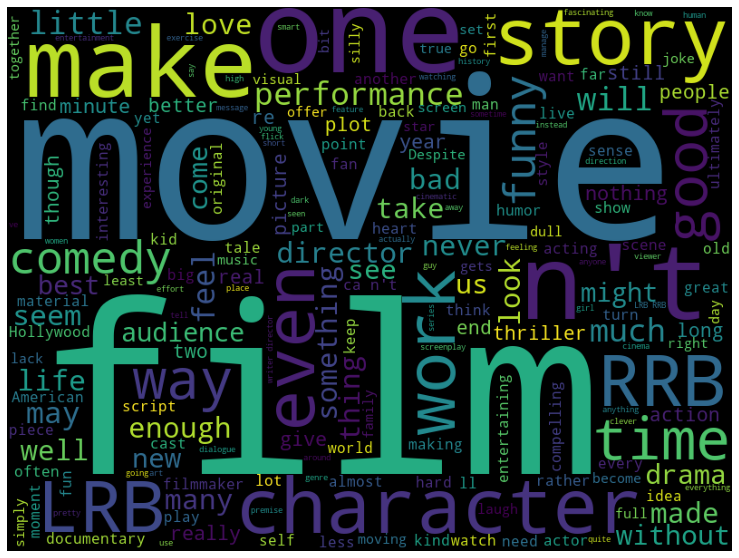

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(df['Sentence']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

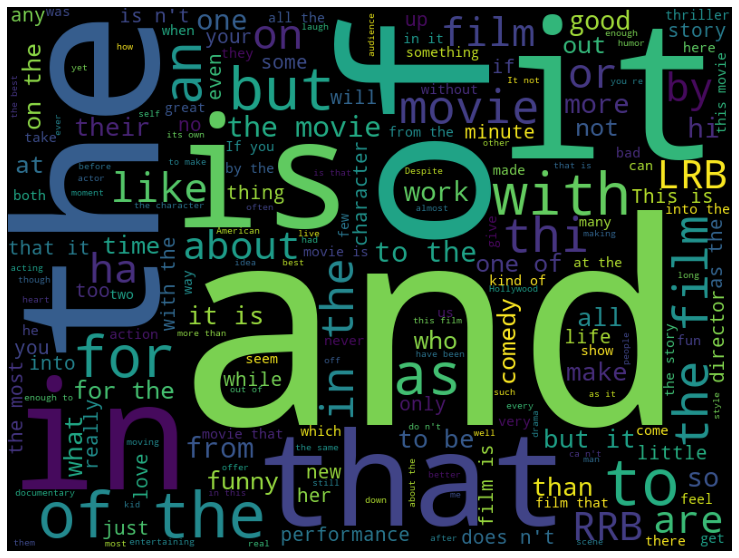

In [ ]:
wordcloud = WordCloud(stopwords='none', background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(df['Sentence']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()